In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-counties-covid-19-dataset/us-counties.csv


In [2]:
us_loc = pd.read_csv("../input/us-counties-covid-19-dataset/us-counties.csv", parse_dates=['date'],
                                index_col=['date'])
us_loc.tail()

,county,state,fips,cases,deaths
date,,,,,
2022-05-13,Sweetwater,Wyoming,56037.0,11088,126.0
2022-05-13,Teton,Wyoming,56039.0,10074,16.0
2022-05-13,Uinta,Wyoming,56041.0,5643,39.0
2022-05-13,Washakie,Wyoming,56043.0,2358,44.0
2022-05-13,Weston,Wyoming,56045.0,1588,18.0


In [3]:
# New York City
new_york = us_loc[us_loc["county"] == "New York City"]
new_york.head()

,county,state,fips,cases,deaths
date,,,,,
2020-03-01,New York City,New York,NaN,1,0.0
2020-03-02,New York City,New York,NaN,1,0.0
2020-03-03,New York City,New York,NaN,2,0.0
2020-03-04,New York City,New York,NaN,2,0.0
2020-03-05,New York City,New York,NaN,4,0.0


In [4]:
new_york["new_cases"] = new_york['cases'] - new_york['cases'].shift(1)
new_york["new_cases"] = new_york["new_cases"].replace('NaN', 0)
new_york.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,state,fips,cases,deaths,new_cases
date,,,,,,
2020-03-01,New York City,New York,NaN,1,0.0,NaN
2020-03-02,New York City,New York,NaN,1,0.0,0.0
2020-03-03,New York City,New York,NaN,2,0.0,1.0
2020-03-04,New York City,New York,NaN,2,0.0,0.0
2020-03-05,New York City,New York,NaN,4,0.0,2.0


# Number of total cases of COVID-19 New York City has recorded

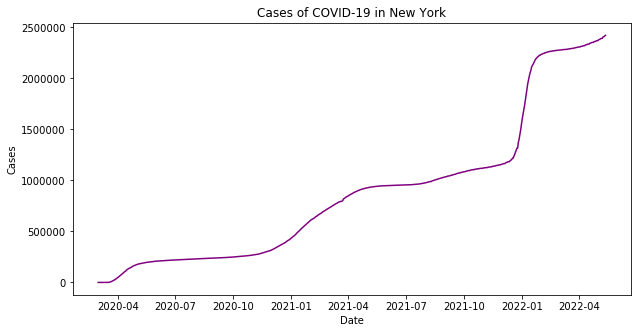

In [5]:
# Line chart for all New York cases of COVID-19
# Figure and plotspace size
fig, ax = plt.subplots(figsize=(10, 5))

# x-axis and y-axis
ax.plot(new_york.index.values,
        new_york['cases'],
        color='purple')

# Title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Cases of COVID-19 in New York")

# Show the chart
plt.show()

# Number of new cases of COVID-19 New York City has recorded

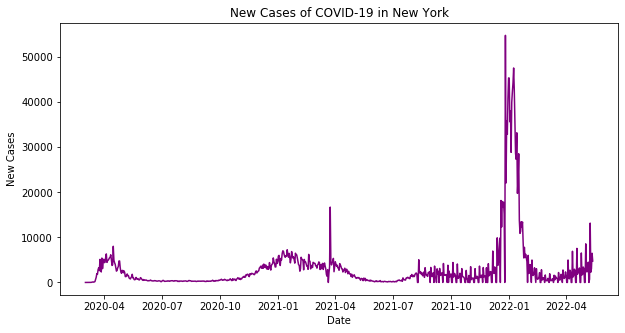

In [6]:
# Line chart for all New York cases of COVID-19
# Figure and plotspace size
fig, ax = plt.subplots(figsize=(10, 5))

# x-axis and y-axis
ax.plot(new_york.index.values,
        new_york['new_cases'],
        color='purple')

# Title and labels for axes
ax.set(xlabel="Date",
       ylabel="New Cases",
       title="New Cases of COVID-19 in New York")

# Show the chart
plt.show()

In [8]:
df = new_york.reset_index()

In [9]:
from datetime import datetime
mask = (df['date'] > '2020-03-10')
df = df.loc[mask]
df.head()

,date,county,state,fips,cases,deaths,new_cases
10,2020-03-11,New York City,New York,NaN,52,0.0,15.0
11,2020-03-12,New York City,New York,NaN,96,0.0,44.0
12,2020-03-13,New York City,New York,NaN,155,0.0,59.0
13,2020-03-14,New York City,New York,NaN,269,1.0,114.0
14,2020-03-15,New York City,New York,NaN,330,5.0,61.0


In [10]:
df=df.rename(columns={'date':'ds', 'cases':'y'})
df.head()

,ds,county,state,fips,y,deaths,new_cases
10,2020-03-11,New York City,New York,NaN,52,0.0,15.0
11,2020-03-12,New York City,New York,NaN,96,0.0,44.0
12,2020-03-13,New York City,New York,NaN,155,0.0,59.0
13,2020-03-14,New York City,New York,NaN,269,1.0,114.0
14,2020-03-15,New York City,New York,NaN,330,5.0,61.0


# Using Prophet to predict total future cases of COVID-19 in New York City

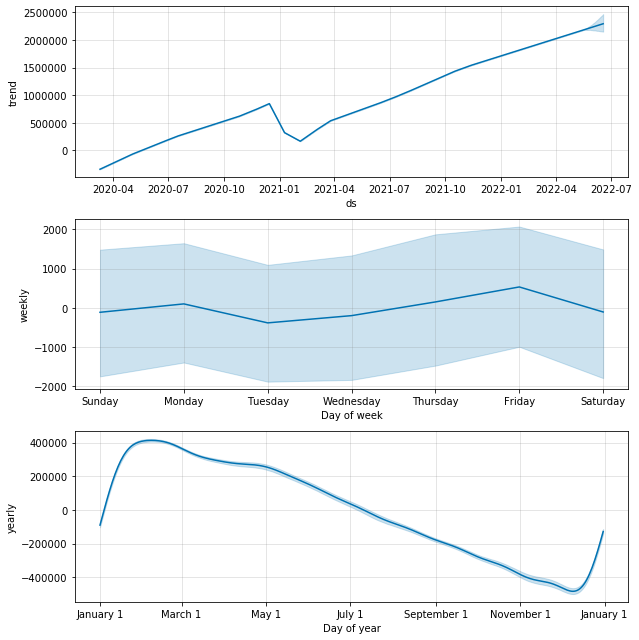

In [12]:
from fbprophet import Prophet
m = Prophet(mcmc_samples=300)
m.fit(df)
future = m.make_future_dataframe(periods=36, freq='D')
forecast = Prophet(interval_width=0.95).fit(df).predict(future)
#forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)
#forecast = model.predict(future)
#model.plot(forecast)

In [13]:
df1 = new_york.reset_index()
mask = (df1['date'] > '2020-03-10')
df1 = df1.loc[mask]
df1 = df1.rename(columns={'date':'ds', 'new_cases':'y'})
df1.head()

,ds,county,state,fips,cases,deaths,y
10,2020-03-11,New York City,New York,NaN,52,0.0,15.0
11,2020-03-12,New York City,New York,NaN,96,0.0,44.0
12,2020-03-13,New York City,New York,NaN,155,0.0,59.0
13,2020-03-14,New York City,New York,NaN,269,1.0,114.0
14,2020-03-15,New York City,New York,NaN,330,5.0,61.0


# This is Prophet trying to predict a Gaussian curve, which did not go too well.

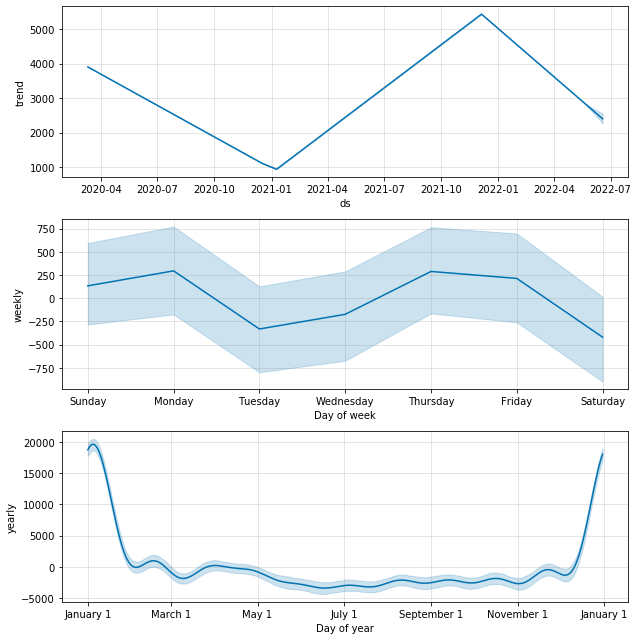

In [14]:
m = Prophet(mcmc_samples=300)
m.fit(df1)
future = m.make_future_dataframe(periods=36, freq='D')
forecast = Prophet(interval_width=0.95).fit(df1).predict(future)
#forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)
#forecast = model.predict(future)
#model.plot(forecast)

Imports that predict scatterplots. I give credit to https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/a7f3991814dd6b2ac3f3f73892b5dcaf9122d296/time_series/ts_utils.py#L345

Di Pietro, M (2020) Python source code (Version 3.0) [Source code]. https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/tree/a7f3991814dd6b2ac3f3f73892b5dcaf9122d296/time_series

In [15]:
from scipy import optimize

def fit_curve(X, y, f=None, kind=None, p0=None):
    ## define f(x) if not specified
    if f is None:
        if kind == "logistic":
            f = lambda p,X: p[0] / (1 + np.exp(-p[1]*(X-p[2])))
        elif find == "gaussian":
            f = lambda p,X: p[0] * np.exp(-0.5 * ((X-p[1])/p[2])**2)
    
    ## find optimal parameters
    model, cov = optimize.curve_fit(f, X, y, maxfev=10000, p0=p0)
    return model

In [16]:
def utils_predict_curve(model, f, X):
    fitted = f(X, model[0], model[1], model[2])
    return fitted

def utils_generate_indexdate(start, end=None, n=None, freq="D"):
    if end is not None:
        index = pd.date_range(start=start, end=end, freq=freq)
    else:
        index = pd.date_range(start=start, periods=n, freq=freq)
    index = index[1:]
    print("--- generating index date --> start:", index[0], "| end:", index[-1], "| len:", len(index), "---")
    return index

def utils_plot_parametric(new_york, zoom=30, figsize=(15,5)):
    ## interval
    new_york["residuals"] = new_york["ts"] - new_york["model"]
    new_york["conf_int_low"] = new_york["forecast"] - 1.96*new_york["residuals"].std()
    new_york["conf_int_up"] = new_york["forecast"] + 1.96*new_york["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    
    ## entire series
    new_york["ts"].plot(marker=".", linestyle='None', ax=ax[0], title="COVID-19 Cases", color="black")
    new_york["model"].plot(ax=ax[0], color="green", label="model", legend=True)
    new_york["forecast"].plot(ax=ax[0], grid=True, color="red", label="forecast", legend=True)
    ax[0].fill_between(x=new_york.index, y1=new_york['conf_int_low'], y2=new_york['conf_int_up'], color='b', alpha=0.3)
   
    ## focus on last
    first_idx = new_york[pd.notnull(new_york["forecast"])].index[0]
    first_loc = new_york.index.tolist().index(first_idx)
    zoom_idx = new_york.index[first_loc-zoom]
    new_york.loc[zoom_idx:]["ts"].plot(marker=".", linestyle='None', ax=ax[1], color="black", 
                                  title="Zoom on the last "+str(zoom)+" observations")
    new_york.loc[zoom_idx:]["model"].plot(ax=ax[1], color="green")
    new_york.loc[zoom_idx:]["forecast"].plot(ax=ax[1], grid=True, color="red")
    ax[1].fill_between(x=new_york.loc[zoom_idx:].index, y1=new_york.loc[zoom_idx:]['conf_int_low'], 
                       y2=new_york.loc[zoom_idx:]['conf_int_up'], color='b', alpha=0.3)
    plt.show()
    return new_york[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

def forecast_curve(ts, f, model, pred_ahead=None, end=None, freq="D", zoom=30, figsize=(15,5)):
    ## fit
    fitted = utils_predict_curve(model, f, X=np.arange(len(ts)))
    new_york = ts.to_frame(name="ts")
    new_york["model"] = fitted
    
    ## index
    index = utils_generate_indexdate(start=ts.index[-1], end=end, n=pred_ahead, freq=freq)
    
    ## forecast
    preds = utils_predict_curve(model, f, X=np.arange(len(ts)+1, len(ts)+1+len(index)))
    new_york = new_york.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    
    ## plot
    utils_plot_parametric(new_york, zoom=zoom)
    return new_york

In [17]:
def f(x): 
    return 90000 / (1 + np.exp(-0.5*(x-20)))

y_logistic = f(x=np.arange(len(new_york)))

In [18]:
def f(X, c, k, m):
    y = c / (1 + np.exp(-k*(X-m)))
    return y

In [29]:
## Fit
model = fit_curve(X=np.arange(len(new_york["cases"])), y=new_york["cases"].values, f=f, p0=[np.max(new_york["cases"]), 1, 1])
model

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

overflow encountered in exp



array([1.93948255e+07, 3.75104811e-03, 1.29784557e+03])

In [20]:
#mask = (new_york.index > '2020-03-10')
#new_york = new_york.loc[mask]
#new_york.head()

# Using a few of ts_utils.py imports to predict the next 60 days of total COVID-19 cases in New York City

--- generating index date --> start: 2022-05-14 00:00:00 | end: 2022-07-11 00:00:00 | len: 59 ---


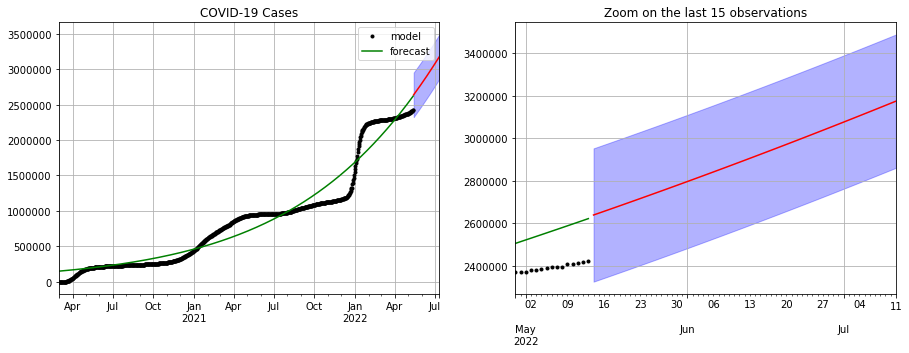

In [21]:
## Forecast
preds = forecast_curve(new_york["cases"], f, model, pred_ahead=60, end=None, freq="D", zoom=15, figsize=(15,5))

In [22]:
def gauss(X, a, b, c):
    y = a * np.exp(-0.5 * ((X-b)/c)**2)
    return y

In [23]:
new_york.fillna(0, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
new_york.head()

,county,state,fips,cases,deaths,new_cases
date,,,,,,
2020-03-01,New York City,New York,0.0,1,0.0,0.0
2020-03-02,New York City,New York,0.0,1,0.0,0.0
2020-03-03,New York City,New York,0.0,2,0.0,1.0
2020-03-04,New York City,New York,0.0,2,0.0,0.0
2020-03-05,New York City,New York,0.0,4,0.0,2.0


In [31]:
new_york.dtypes

county        object
state         object
fips         float64
cases          int64
deaths       float64
new_cases    float64
dtype: object

In [26]:
#mask = (new_york['date'] > '2020-03-10')
#new_york = new_york.loc[mask]
#new_york.head()

In [32]:
model = fit_curve(X=np.arange(len(new_york["new_cases"])), y=new_york["new_cases"].values, f=gauss, p0=[1, np.mean(new_york["new_cases"]), np.std(new_york["new_cases"])])
model

array([5903.94707602,  934.98995397,  438.58763579])

# Using a few of ts_utils.py imports to predict the next 60 days of new COVID-19 cases in New York City

--- generating index date --> start: 2022-05-14 00:00:00 | end: 2022-07-11 00:00:00 | len: 59 ---


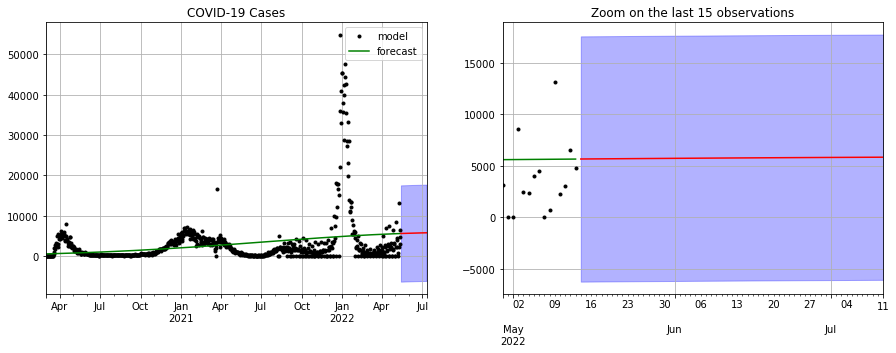

In [33]:
preds = forecast_curve(new_york["new_cases"], gauss, model, pred_ahead=60, end=None, freq="D", zoom=15, figsize=(15,5))

# Conclusion: According to this model, it looks like June 1st is the predicted date for there to be no more new cases in New York City